In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#
df = pd.read_csv('../data/mmALL_073119_csv.csv')

In [175]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [177]:
df.shape

(16363, 31)

In [178]:
df = df[df['protest'] == 1]

In [179]:
df.shape

(14514, 31)

In [181]:
df.drop(columns=['id', 'ccode', 'protest', 'location', 'participants_category', 'protesteridentity', 'sources'], inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14514 entries, 0 to 16360
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            14514 non-null  object 
 1   year               14514 non-null  int64  
 2   region             14514 non-null  object 
 3   protestnumber      14514 non-null  int64  
 4   startday           14514 non-null  float64
 5   startmonth         14514 non-null  float64
 6   startyear          14514 non-null  float64
 7   endday             14514 non-null  float64
 8   endmonth           14514 non-null  float64
 9   endyear            14514 non-null  float64
 10  protesterviolence  14514 non-null  float64
 11  participants       14502 non-null  object 
 12  protesterdemand1   14503 non-null  object 
 13  protesterdemand2   2676 non-null   object 
 14  protesterdemand3   316 non-null    object 
 15  protesterdemand4   766 non-null    object 
 16  stateresponse1     144

## Create dummy columns for protester demands

In [183]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [184]:
df = df[df['protesterdemand1'].notnull()]

In [185]:
df.shape

(14503, 24)

In [186]:
df['protesterdemand2'].value_counts()

political behavior, process    973
removal of politician          603
labor wage dispute             417
price increases, tax policy    201
social restrictions            201
police brutality               181
land farm issue                100
Name: protesterdemand2, dtype: int64

In [187]:
df['protesterdemand3'].value_counts()

price increases, tax policy    111
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [188]:
df['protesterdemand4'].value_counts()

.                              744
police brutality                 7
removal of politician            5
land farm issue                  3
political behavior, process      3
price increases, tax policy      2
labor wage dispute               2
Name: protesterdemand4, dtype: int64

In [189]:
# Create a list of all the demand columns
demands = ['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']

In [190]:
# Combine the different protester demand columns into a list inside a single column
df['protesterdemands'] = df[demands].values.tolist()

# Source: https://stackoverflow.com/questions/43898035/pandas-combine-column-values-into-a-list-in-a-new-column

In [191]:
# Turn the list of protester demands into dummy columns
demand_dummy = pd.get_dummies(df['protesterdemands'].apply(pd.Series).stack(), drop_first=True).sum(level=0)

# Source: https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

In [192]:
demand_dummy.head()

,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [193]:
# Add the dummy columns back into the original data frame
df = pd.concat([df, demand_dummy], axis =1)

In [194]:
df.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,stateresponse7,notes,protesterdemands,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
0,Canada,1990,North America,1,15.0,1.0,1990.0,15.0,1.0,1990.0,...,NaN,Canada s railway passenger system was finally...,"[political behavior, process, labor wage dispu...",1,0,0,1,0,0,0
1,Canada,1990,North America,2,25.0,6.0,1990.0,25.0,6.0,1990.0,...,NaN,protestors were only identified as young peop...,"[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0
2,Canada,1990,North America,3,1.0,7.0,1990.0,1.0,7.0,1990.0,...,NaN,"THE Queen, after calling on Canadians to rema...","[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0
3,Canada,1990,North America,4,12.0,7.0,1990.0,6.0,9.0,1990.0,...,NaN,Canada s federal government has agreed to acq...,"[land farm issue, nan, nan, nan]",0,1,0,0,0,0,0
4,Canada,1990,North America,5,14.0,8.0,1990.0,15.0,8.0,1990.0,...,NaN,Protests were directed against the state due t...,"[political behavior, process, nan, nan, nan]",0,0,0,1,0,0,0


In [195]:
# Drop old columns
df.drop(columns=['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4', 'protesterdemands'], inplace=True)

In [196]:
# Recode the 2 in 'removal of politician' column to 1
df['removal of politician'] = df['removal of politician'].replace([2],1)


### Some EDA on protester demands

In [197]:
df['labor wage dispute'].value_counts()

0    12357
1     2146
Name: labor wage dispute, dtype: int64

In [198]:
# ^ same as the sum of the count of labor wage dispute for the 4 demand columns
1667 + 417 + 60 + 2

2146

In [199]:
df['land farm issue'].value_counts()

0    13940
1      563
Name: land farm issue, dtype: int64

In [200]:
df['police brutality'].value_counts()

0    13502
1     1001
Name: police brutality, dtype: int64

In [201]:
df['political behavior, process'].value_counts()

1    10192
0     4311
Name: political behavior, process, dtype: int64

In [202]:
df['price increases, tax policy'].value_counts()

0    13130
1     1373
Name: price increases, tax policy, dtype: int64

In [203]:
df['removal of politician'].value_counts()

0    12891
1     1612
Name: removal of politician, dtype: int64

In [204]:
df['social restrictions'].value_counts()

0    13875
1      628
Name: social restrictions, dtype: int64

In [205]:
df.columns

Index(['country', 'year', 'region', 'protestnumber', 'startday', 'startmonth',
       'startyear', 'endday', 'endmonth', 'endyear', 'protesterviolence',
       'participants', 'stateresponse1', 'stateresponse2', 'stateresponse3',
       'stateresponse4', 'stateresponse5', 'stateresponse6', 'stateresponse7',
       'notes', 'labor wage dispute', 'land farm issue', 'police brutality',
       'political behavior, process', 'price increases, tax policy',
       'removal of politician', 'social restrictions'],
      dtype='object')

In [206]:
demands_list = ['labor wage dispute', 'land farm issue', 'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician', 'social restrictions']

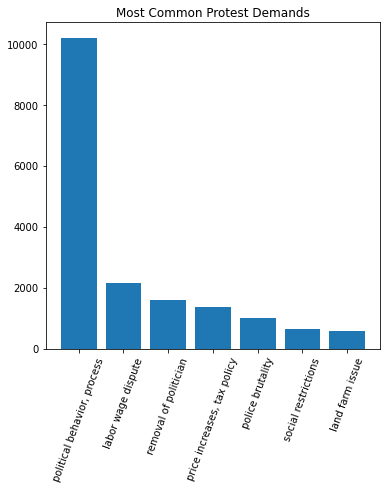

In [207]:
plt.figure(figsize = (6,6))
demands_fig = df[demands_list].sum().sort_values(ascending=False)
plt.title('Most Common Protest Demands')
plt.bar(demands_fig.index, demands_fig)
plt.xticks(rotation = 70);

    


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14503 entries, 0 to 16360
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      14503 non-null  object 
 1   year                         14503 non-null  int64  
 2   region                       14503 non-null  object 
 3   protestnumber                14503 non-null  int64  
 4   startday                     14503 non-null  float64
 5   startmonth                   14503 non-null  float64
 6   startyear                    14503 non-null  float64
 7   endday                       14503 non-null  float64
 8   endmonth                     14503 non-null  float64
 9   endyear                      14503 non-null  float64
 10  protesterviolence            14503 non-null  float64
 11  participants                 14491 non-null  object 
 12  stateresponse1               14474 non-null  object 
 13  stateresponse2  